# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview
This project involves working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. I will explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is included in the Coursera Jupyter Notebook environment, however if working off-platform it can be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

Potential tasks and areas of interest include the following:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

# Task 1: Load the Data

In [1]:
# Install and/or import appropriate libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [2]:
# Load excel file into dataframe
retail = pd.read_excel('Online Retail.xlsx')

In [3]:
# Display the first few rows of dataframe
retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


# Task 2: Cursory Analysis

In [5]:
# Information on row and column ranges, null counts, and data types
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# Sum of unique values for each coloumn
print(f'\nUnique values:\n {retail.nunique()}')


Unique values:
 InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [7]:
# Missing Values
print(f'\nMissing values:\n {retail.isnull().sum()}')


Missing values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
# Check for duplicate rows
print(f'\nRedundant Rows:\n {retail.duplicated().sum()}')


Redundant Rows:
 5268


In [9]:
# Descriptive Statistics
retail.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


## Initial Impressions
- There appear to be over 5000 duplicate rows.
- Description and CustomerID are the only columns with missing values.
- Given that this frame represents transactional data I notice there are negative or zero values for both Quantity and UnitPrice?
- CustomerID represents a Nominal Category but is indexed as type: float.
- Also, there should be a column for transaction amount.

## Task 3: Data Wrangling & EDA

First drop all duplicate rows then set the CustomerID and InvoiceNo data types to string.

In [13]:
# Check original size
print(f'Before drop: {retail.shape}')

# Drop duplicate rows
retail.drop_duplicates(inplace=True, ignore_index=True)
print(f'After drop: {retail.shape}')
print('-' * 100)

# Convert CustomerID to string without the decimal point
retail['CustomerID'] = retail['CustomerID'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)

# Cast the 'InvoiceNo' column to string
retail['InvoiceNo'] = retail['InvoiceNo'].astype(str)

# Return np.nan back to all null CustomerID cells
retail['CustomerID'].replace(to_replace={'nan': np.nan}, inplace=True)

print(retail.info())

Before drop: (541909, 8)
After drop: (536641, 8)
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 32.8+ MB
None


Re-check null values

In [15]:
# Missing Values
fields = ['Description', 'CustomerID']
print(f'\nMissing values:\n {retail[fields].isnull().sum()}')


Missing values:
 Description      1454
CustomerID     135037
dtype: int64


Add a column to represent the sale of each item by its quantity: ItemSales.

In [17]:
# Create a column for Amount by item
retail['ItemSales'] = np.round((retail['Quantity'] * retail['UnitPrice']),2)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ItemSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Investigate the description column:
- There are over 130,000 null values in CustomerID. Too many to just dismiss.
- There are negative values in the ItemSales column. It's possible these rows could represent returns, damaged or missing items, or even theft.
- I'd like to classify transactions by type and add it as a new column to the frame. But, first, I need to generate a set of conditions by which to filter the Description column.

In [30]:
# Produce a number of conditions by which to filter descriptions.
condition1 = retail['Description'].str.contains(r'\?{1,3}', regex=True, na=False)  # Matches '?', '??', '???'
condition2 = retail['Description'].str.contains('dam', regex=False, na=False)
condition3 = retail['Description'].str.contains('lost', regex=False, na=False)
condition4 = retail['Description'].str.contains('check', regex=False, na=False)  
condition5 = retail['Description'].str.contains('adjust', regex=False, na=False)
condition6 = retail['Description'].str.contains('credit', regex=False, na=False)
condition7 = retail['Description'].str.contains('return', regex=False, na=False)
condition8 = retail['Description'].str.contains('refund', regex=False, na=False)
condition9 = retail['Description'].str.contains('missing', regex=False, na=False)
condition10 = retail['Description'].str.contains('discount', regex=False, na=False)
condition11 = retail['Description'].str.contains('mixed up', regex=False, na=False)
condition12 = retail['Description'] == 'CHECK'
condition13 = retail['Description'].str.contains('wet', regex=False, na=False)
condition14 = retail['Description'].str.contains('code', regex=False, na=False)

In [31]:
# Create a dataframe for all non-standard descriptions
odd = retail.loc[condition1|condition2|condition3|condition4|condition5|condition6|condition7|condition8|condition9|condition10|condition11|condition12|condition13|condition14]
# Print as a list all values for the column Description created by this new frame
odd_list = odd['Description'].drop_duplicates().sort_values().to_list()
print(odd_list)

['?', '? sold as sets?', '??', '?? missing', '???', '????damages????', '????missing', '???lost', '???missing', '?display?', '?lost', '?missing', '?sold as sets?', 'CHECK', 'OOPS ! adjustment', 'POSSIBLE DAMAGES OR LOST?', 'Water damaged', 'adjust', 'adjustment', 'amazon adjust', 'barcode problem', 'came coded as 20713', 'check', 'check?', 'code mix up? 84930', 'damaged', 'damaged stock', 'damages', 'damages wax', 'damages/credits from ASOS.', 'damages/display', 'damages/dotcom?', 'damages/showroom etc', 'damages?', 'did  a credit  and did not tick ret', 'dotcom adjust', 'historic computer difference?....se', 'incorrectly credited C550456 see 47', 'lost', 'lost in space', 'lost??', 'missing', 'missing?', 'mixed up', 're-adjustment', 'returned', 'reverse 21/5/10 adjustment', 'reverse previous adjustment', 'samples/damages', 'sold in set?', 'sold with wrong barcode', 'stock check', 'stock creditted wrongly', 'taig adjust', 'taig adjust no stock', 'temp adjustment', 'water damage', 'water 

- When queried as to how many transactions have positive ItemSales, the (odd) dataframe yields only one result which is described as an 'adjustment'.
- The sliced (retail) frame created from all 'null' description values yields no positive ItemSales data.
- These results suggest that neither frame represents valid customer sales data.

In [33]:
# Rows containing positive ItemSales for 'null' and 'odd' description values
print(odd[odd['ItemSales'] > 0])
print(' ')
print(retail[retail['Description'].isna()].loc[retail['ItemSales'] > 0])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, ItemSales]
Index: []
 
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, ItemSales]
Index: []


## Handling Null Values
 - Replace 1454 null values in the Description column with the label: Unknown
   * Include in that designation all values containing only question marks: '?', '??', '???'
 - Replace all null values int the CustomerID column with the placeholder: UnknownCustomer

In [35]:
# Fill null values in 'Description' with 'Unknown'
retail['Description'].fillna('Unknown', inplace=True)

# Replace '?'s with 'Unknown'
retail['Description'] = retail['Description'].replace(r'\?{1,3}', 'Unknown', regex=True)

# Fill null 'CustomerID' with a placeholder
retail['CustomerID'].fillna('UnknownCustomer', inplace=True)

## Pairing the 'odd' list with other attributes produces several distinct categories:
- Discount              (stock code labeled 'D')
- Refund                (invoice numbers begining with 'C')
- Returned              (return, returned)
- Lost or Missing       (lost, missing)
- Damaged               (damage, damaged, water, wet)
- Stock Check           (check, stock check)
- Adjusted              (adjust, adjustment, temp adjustment)
- Sale                  (Transaction greater than zero)

The more ambiguous values ('? sold as sets?', '?display?', '?sold as sets?', 'code mix up? 84930', 'historic computer difference?....se', 'mixed up',  'sold in set?', 'wrong code?') will become a default category once transactions have been filtered through all other labels.

## Bin Transaction types

In [38]:
# Function for filtering transaction type
def get_transaction_type(row):
    if (row['StockCode'] == 'D') and condition10[row.name]:  # First check for Discount
        return 'Discount'
    elif row['InvoiceNo'].startswith('C'):  # Then check for Refund
        return 'Refund'
    elif condition7[row.name]:
        return 'Return'
    elif condition3[row.name] or condition9[row.name]:
        return 'Lost or Missing'
    elif condition2[row.name] or condition13[row.name]:
        return 'Damaged'
    elif condition4[row.name] or condition12[row.name]:
        return 'Stock Check'
    elif condition5[row.name] or row['InvoiceNo'].startswith('A'):
        return 'Adjustment'
    elif row['ItemSales'] > 0:
        return 'Sale'
    else:
        return 'Ambiguous'

# Apply the function to the DataFrame
retail['TransactionType'] = retail.apply(get_transaction_type, axis=1)

## Summary of Transaction Types

In [45]:
import statistics as stat
# Grouping by 'TransactionType' and aggregating
transaction_summary = retail.groupby('TransactionType').agg(
    InvoiceCount=('InvoiceNo', 'nunique'),       # Count of unique invoices
    TotalItemSales=('ItemSales', 'sum'),         # Total sales per transaction type
    MostFrequentCountry=('Country', stat.mode),  # Most frequent country
    MostFrequentCustomerID=('CustomerID', stat.mode)  # Most frequent customer ID
).reset_index()

# Display the summary
transaction_summary

,TransactionType,InvoiceCount,TotalItemSales,MostFrequentCountry,MostFrequentCustomerID
0,Adjustment,31,-11062.06,United Kingdom,UnknownCustomer
1,Ambiguous,1829,0.00,United Kingdom,UnknownCustomer
2,Damaged,120,0.00,United Kingdom,UnknownCustomer
3,Lost or Missing,15,0.00,United Kingdom,UnknownCustomer
4,Refund,3836,-893979.73,United Kingdom,UnknownCustomer
5,Return,2,0.00,United Kingdom,UnknownCustomer
6,Sale,19959,10631048.74,United Kingdom,UnknownCustomer
7,Stock Check,165,0.00,United Kingdom,UnknownCustomer


# Task 4: Data Visualization

## Sales Data
For this section, only transactions with 'ItemSales' amounts over $0 were considered for analysis.

Verify that each invoice has only a single date, customer ID and country
- Select all transaction types labeled 'Sale' and group by Invoice Number
- Aggregate relevant columns
- It is assumed that aggregating the sales data will produce lists of multiple items for each row or distinct 'InvoiceNo'

In [50]:
columns = ['Description', 'InvoiceDate', 'CustomerID', 'Country', 'ItemSales']
sales = retail[retail['TransactionType'] == 'Sale'].groupby('InvoiceNo')[columns].agg({'Description':'unique',
                                                                                       'InvoiceDate':'unique',
                                                                                       'CustomerID':'unique',
                                                                                       'Country':'unique',
                                                                                       'ItemSales':'sum'}).reset_index()

# Check assumption that aggregation does not prodcue lists of length greater than 1 for unique values with the exeption of 'Description'
lengths = {}

# Iterate through the specified columns
for column in columns[1:4]:  # Assuming 'Description' is not needed here
    lengths[column] = []  # Initialize an empty list for each column

    for item in sales[column]:
        # Check if the item is a list-like object (like a list or numpy array)
        if isinstance(item, (list, np.ndarray)):
            lengths[column].append(len(item))
        else:
            # If it's not a list-like object, append None or 1 depending on what you want to track
            lengths[column].append(1)

# Now, lengths will contain lists of lengths for each column.
# You can print them or check for lengths greater than 1.
for column, length_list in lengths.items():
    print(f"Column: {column}")
    print(f"Lengths greater than 1: {sum(1 for length in length_list if length > 1)} out of {len(length_list)}")

Column: InvoiceDate
Lengths greater than 1: 0 out of 19959
Column: CustomerID
Lengths greater than 1: 0 out of 19959
Column: Country
Lengths greater than 1: 0 out of 19959


Apply a lambda function to only select the first value in any list produced by the aggregation

In [111]:
# Aggregate the sales data by InvoiceNo, grouping by the specified columns
columns = ['Description', 'InvoiceDate', 'CustomerID', 'Country', 'ItemSales']
sales = retail[retail['TransactionType'] == 'Sale'].groupby('InvoiceNo')[columns].agg({
    'Description': 'unique',
    'InvoiceDate': 'unique',
    'CustomerID': 'unique',
    'Country': 'unique',
    'ItemSales': 'sum'
}).reset_index()

# Apply the lambda function to flatten the columns
sales['InvoiceDate'] = sales['InvoiceDate'].apply(lambda x: x[0] if len(x) > 0 else None)
sales['CustomerID'] = sales['CustomerID'].apply(lambda x: x[0] if len(x) > 0 else None)
sales['Country'] = sales['Country'].apply(lambda x: x[0] if len(x) > 0 else None)

# Rename columns for clarity
sales.columns = ['InvoiceNo', 'Description', 'InvoiceDate', 'CustomerID', 'Country', 'InvoiceTotal']

# Extract the month from InvoiceDate
sales['Month'] = pd.to_datetime(sales['InvoiceDate']).dt.month
sales['Day'] = sales['InvoiceDate'].dt.day_name()
# Reorder the columns
sales = sales[['InvoiceNo', 'Description', 'InvoiceDate', 'Month', 'Day', 'CustomerID', 'Country', 'InvoiceTotal']]

sales

,InvoiceNo,Description,InvoiceDate,Month,Day,CustomerID,Country,InvoiceTotal
0,536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",2010-12-01 08:26:00,12,Wednesday,17850,United Kingdom,139.12
1,536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA...",2010-12-01 08:28:00,12,Wednesday,17850,United Kingdom,22.20
2,536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...",2010-12-01 08:34:00,12,Wednesday,13047,United Kingdom,278.73
3,536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS...",2010-12-01 08:34:00,12,Wednesday,13047,United Kingdom,70.05
4,536369,[BATH BUILDING BLOCK WORD],2010-12-01 08:35:00,12,Wednesday,13047,United Kingdom,17.85
...,...,...,...,...,...,...,...,...
19954,581583,"[LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HEA...",2011-12-09 12:23:00,12,Friday,13777,United Kingdom,124.60
19955,581584,"[RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE...",2011-12-09 12:25:00,12,Friday,13777,United Kingdom,140.64
19956,581585,"[BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTT...",2011-12-09 12:31:00,12,Friday,15804,United Kingdom,329.05
19957,581586,"[LARGE CAKE STAND HANGING STRAWBERY, SET OF 3...",2011-12-09 12:49:00,12,Friday,13113,United Kingdom,339.20


### Histogram of Log-Transformed Invoice Totals

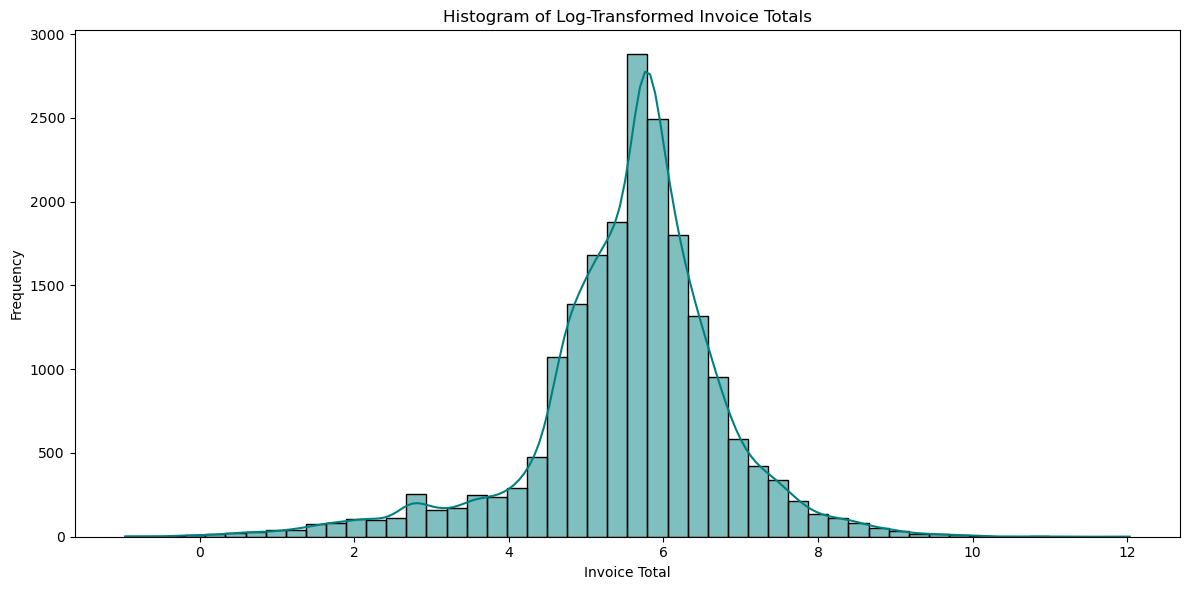

In [84]:
plt.figure(figsize=(12, 6))
sns.histplot(data=np.log(sales['InvoiceTotal']), bins=50, kde=True, color='teal')
plt.xlabel('Invoice Total')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Invoice Totals (2010 to 2011)')
plt.tight_layout()
plt.savefig('plots/histogram_log_invoice_totals.png')
plt.show()

A natural log scale was used to better depict the distribution of Invoice Totals.

### Scatter Plot of Invoice Sales vs Time

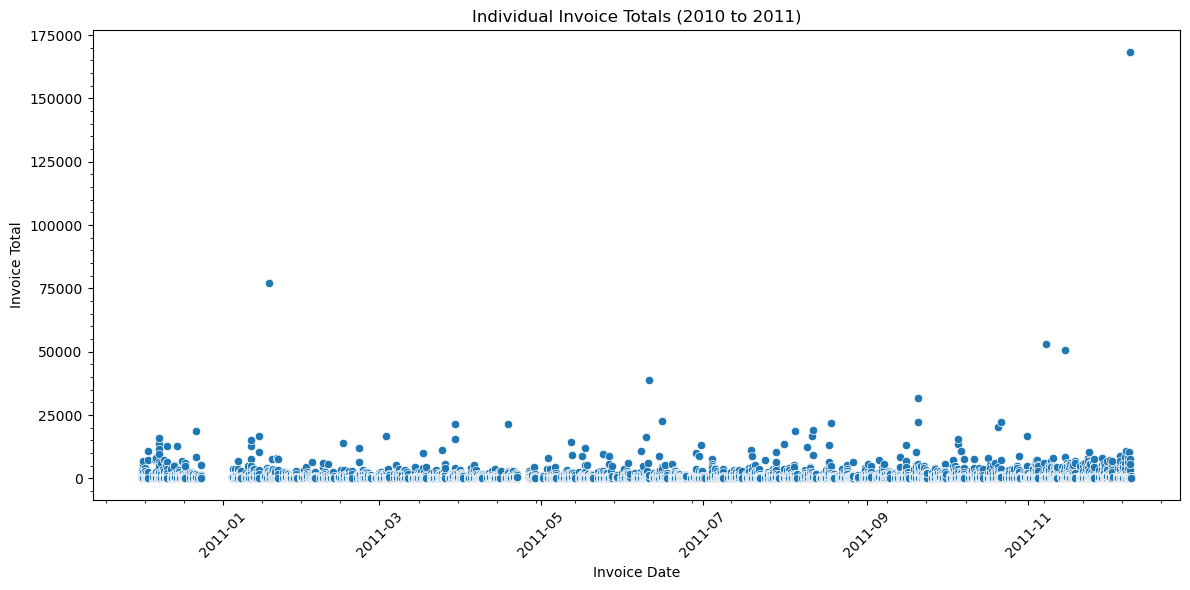

In [147]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='InvoiceDate', y='InvoiceTotal', data=sales)
plt.minorticks_on()
plt.xticks(rotation=45)
plt.title('Individual Invoice Totals (2010 to 2011)')
plt.xlabel('Invoice Date')
plt.ylabel('Invoice Total')
plt.tight_layout()
plt.savefig('plots/scatter_totals_vs_time.png')
plt.show()

### Box Plot of Invoice Sales by Month

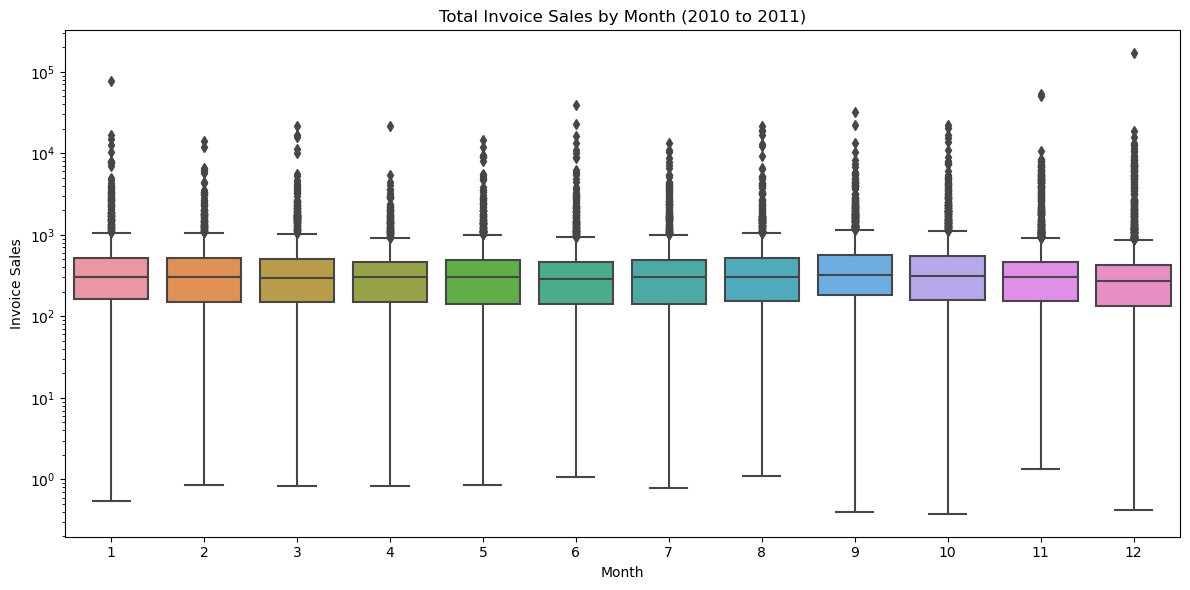

In [185]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='InvoiceTotal', data=sales)
plt.yscale('log')
plt.title('Total Invoice Sales by Month (2010 to 2011)')
plt.xlabel('Month')
plt.ylabel('Invoice Sales')
plt.tight_layout()
plt.savefig('plots/box_totals_by_month.png')
plt.show()

There is very little change in Invoice Sales between months but there are several outliers for each month.

### Bar Plot of Average Invoice Sales by Day

In [189]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = sales.groupby('Day').agg(InvoiceTotalSums=('InvoiceTotal', 'sum')).reindex(cats).reset_index()
day_sales

,Day,InvoiceTotalSums
0,Monday,1775782.07
1,Tuesday,2175700.51
2,Wednesday,1847074.38
3,Thursday,2199292.57
4,Friday,1826408.43
5,Saturday,NaN
6,Sunday,806790.78


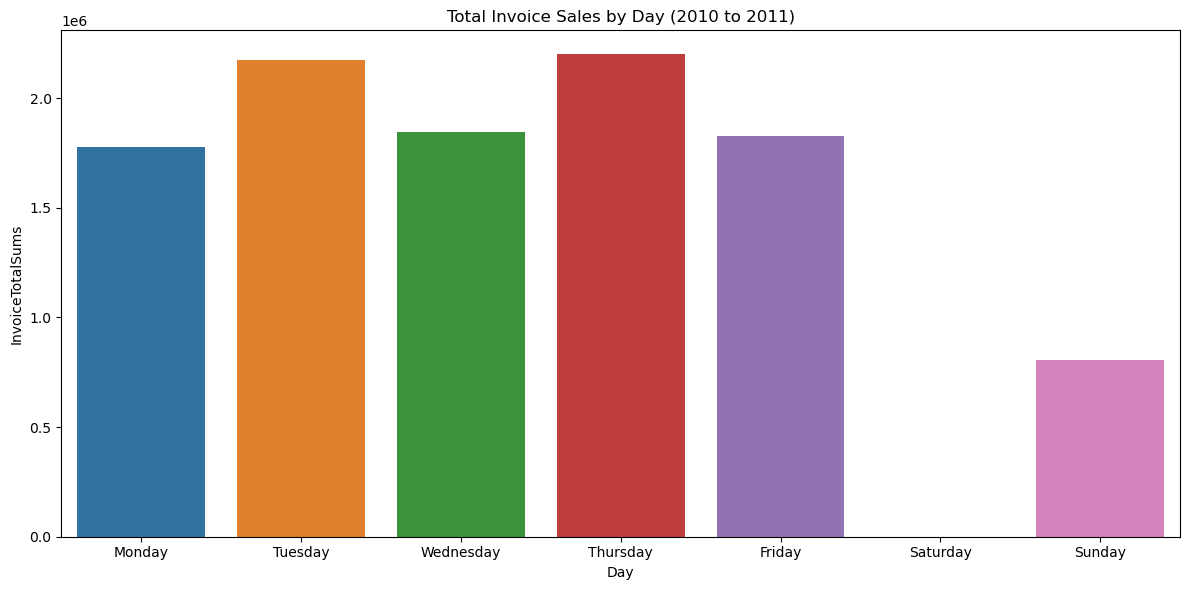

In [191]:
plt.figure(figsize=(12, 6))
sns.barplot(data=day_sales, x='Day', y='InvoiceTotalSums')
plt.xlabel('Day')
plt.ylabel('InvoiceTotalSums')
plt.title('Total Invoice Sales by Day (2010 to 2011)')
plt.tight_layout()
plt.savefig('plots/bar_totals_by_day.png')
plt.show()

* Tuesday and Thurday have the highest sales
* There are no sales on Saturday

### Bar Chart of the Top 10 Customers segmented by Country and excluding the 'UnknownCustomer' tag
- In the transaction summary it is shown that customers without IDs dominate all transactions
- The label 'UnknownCustomer' is therfore excluded for this plot in order to focus on meaningful customer behavior

In [195]:
# Step 1: Filter out 'UnknownCustomer'
filtered_sales = sales[sales['CustomerID'] != 'UnknownCustomer']

# Step 2: Group by 'CustomerID' and aggregate 'InvoiceTotal', keeping 'Country'
grouped_sales = filtered_sales.groupby(['CustomerID', 'Country'])['InvoiceTotal'].sum().reset_index()

# Step 3: Sort by 'InvoiceTotal' in descending order and get the top 10 customers
top_10_customers = grouped_sales.sort_values(by='InvoiceTotal', ascending=False).head(10)

# Display the top 10 customers DataFrame
top_10_customers

,CustomerID,Country,InvoiceTotal
1697,14646,Netherlands,280206.02
4209,18102,United Kingdom,259657.30
3736,17450,United Kingdom,194390.79
3016,16446,United Kingdom,168472.50
1887,14911,EIRE,143711.17
57,12415,Australia,124914.53
1341,14156,EIRE,117210.08
3779,17511,United Kingdom,91062.38
2710,16029,United Kingdom,80850.84
0,12346,United Kingdom,77183.60


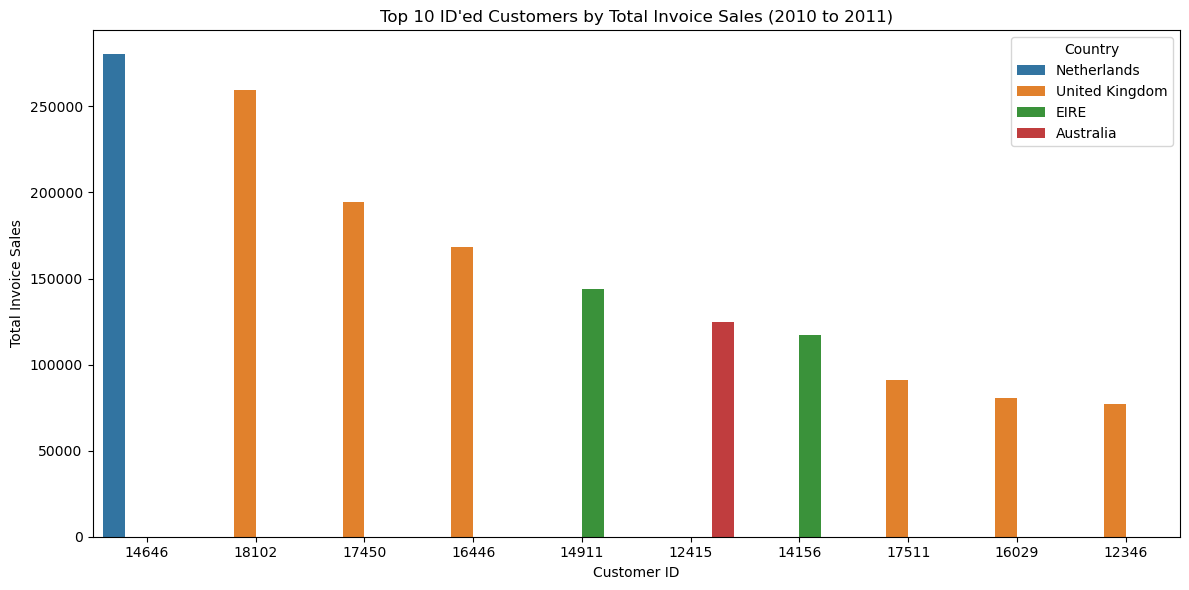

In [196]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_customers, x='CustomerID', y='InvoiceTotal', hue='Country')
plt.title("Top 10 ID'ed Customers by Total Invoice Sales (2010 to 2011)")
plt.xlabel('Customer ID')
plt.ylabel('Total Invoice Sales')
plt.tight_layout()
plt.savefig('plots/bar_top_10_customers.png')
plt.show()

This visual deos not include customers who have IDs marked as 'UnknownCustomer' , which accounts for the majority of sales revenue.

### Bar Plot for the Sum of Invoice Sales by Country

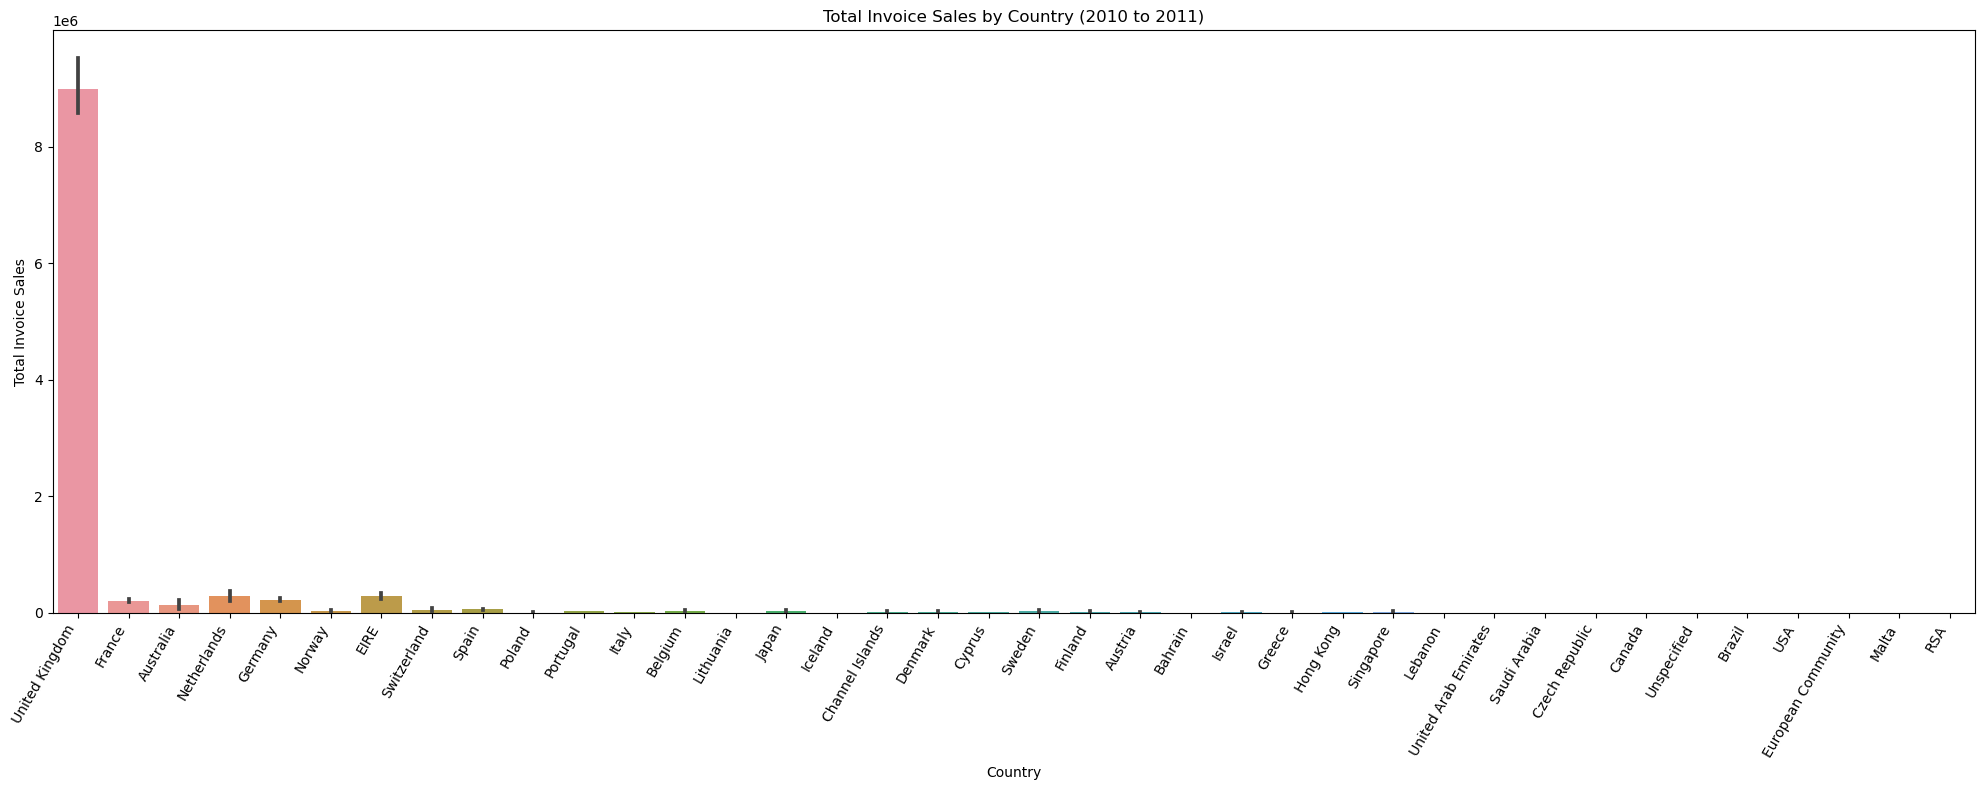

In [201]:
plt.figure(figsize=(20, 8))
sns.barplot(data=sales, x='Country', y='InvoiceTotal', estimator='sum')
plt.xticks(rotation=60, ha='right')
plt.title('Total Invoice Sales by Country (2010 to 2011)')
plt.ylabel('Total Invoice Sales')
plt.xlabel('Country')
plt.tight_layout()
plt.savefig('plots/bar_sales_by_country.png')
plt.show()

Most sales originate for the United Kingdom

### Most Popular Items

Extract the list of items for each invoice in the 'sales' DataFrame then iterate through every list to count each item.

In [205]:
item_list = sales['Description'].to_list()
item_dict = {}

# Iterate through each sublist in the nested list
for sublist in item_list:
    # Iterate through each string in the sublist
    for item in sublist:
        # Update the count of the string in the dictionary
        if item in item_dict:
            item_dict[item] += 1
        else:
            item_dict[item] = 1

top_50_items = pd.DataFrame(item_dict, index=range(4141)).drop_duplicates().T.reset_index(names='Description').rename(columns={0:'Count'}).sort_values(by='Count', ascending=False).head(50)
top_50_items.head()

,Description,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2256
138,JUMBO BAG RED RETROSPOT,2089
529,REGENCY CAKESTAND 3 TIER,1988
1626,PARTY BUNTING,1685
66,LUNCH BAG RED RETROSPOT,1564


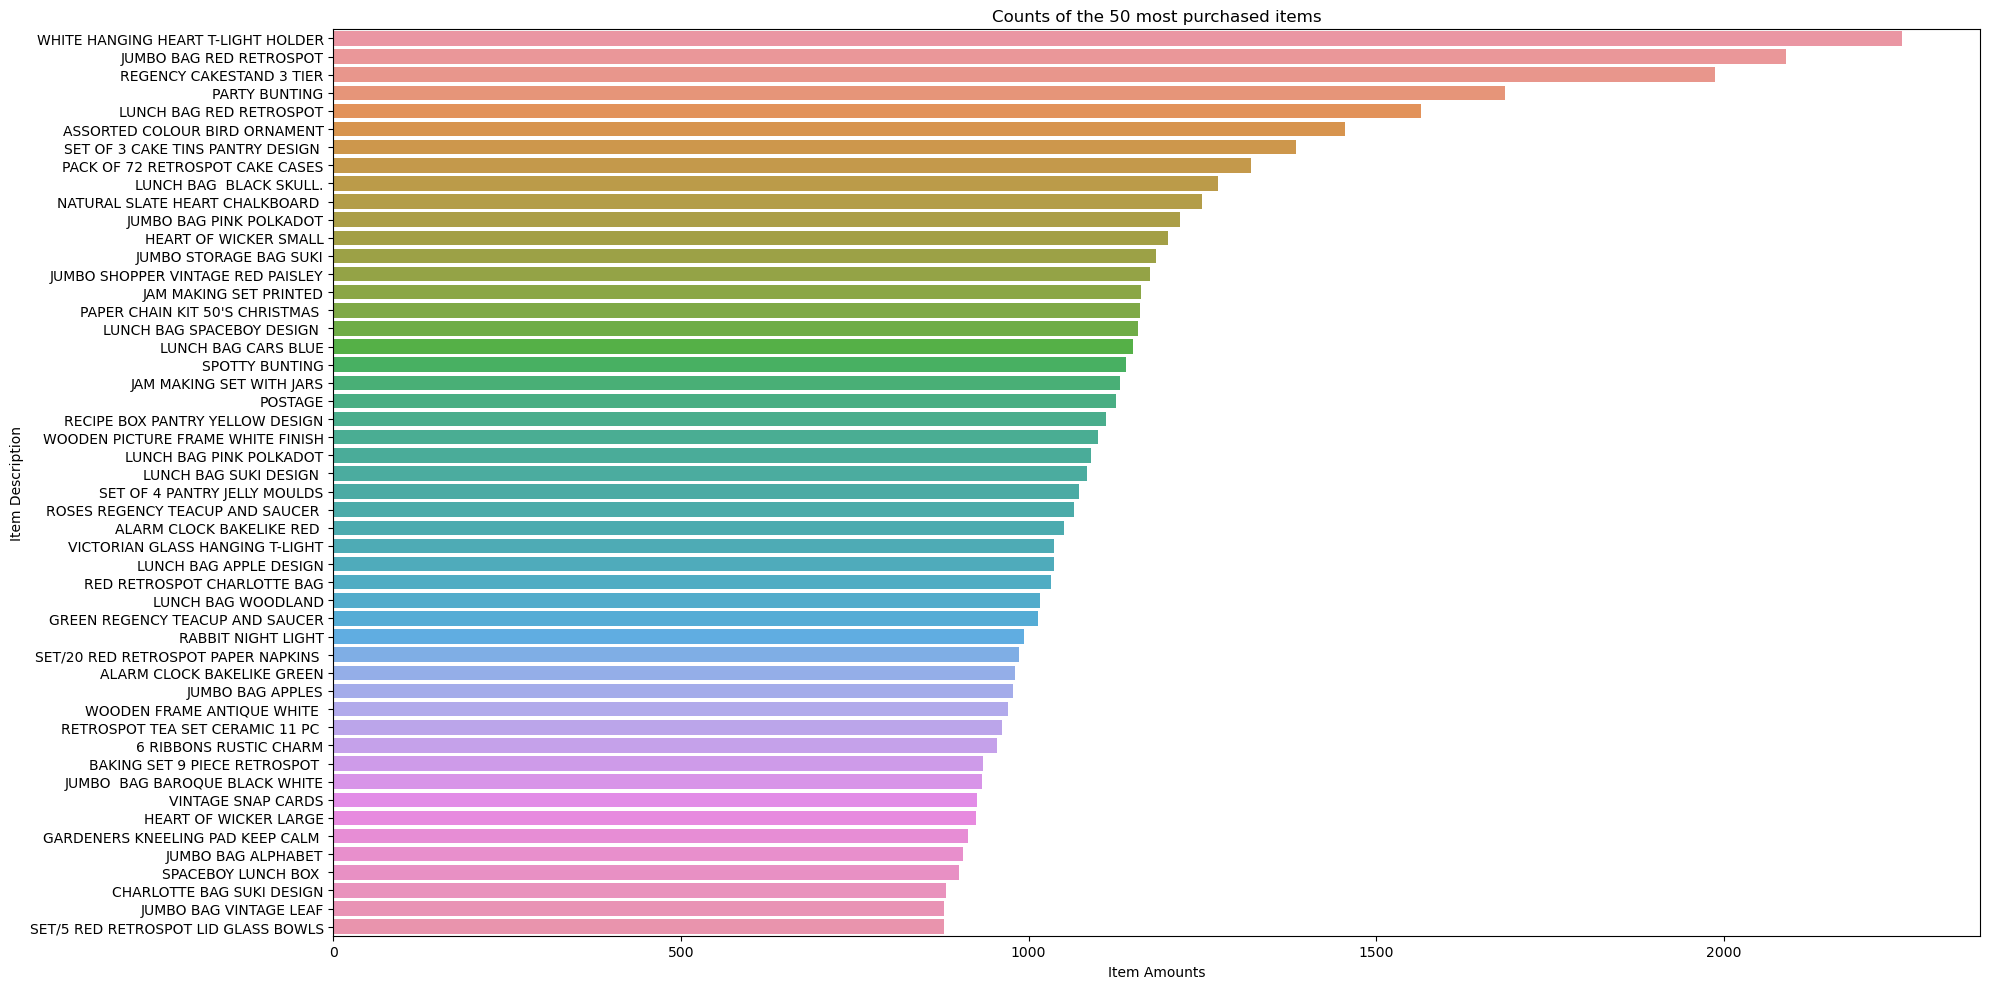

In [207]:
# Bar plot of the 50 most sold items
plt.figure(figsize=(20,10))
sns.barplot(data=top_50_items.head(50), y='Description', x='Count')
plt.title('Counts of the 50 most purchased items')
plt.xlabel('Item Amounts')
plt.ylabel('Item Description')
plt.tight_layout()
plt.savefig('plots/top50_items.png')
plt.show()